### *Каменчук Виктория, гр.ПИ19-1*

На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Я взяла датасет, собранными менеджерами маркетинговых кампаний одного из португальских банковский учреждений.
Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом,

Цель: узнать, будет ли продукт (а именно,банковский срочный вклад) подписан или нет. 

In [2]:
df = pd.read_csv('./data/bank-full.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Датасет состоит из 17 столбцов. 
* 'age' - возраст клиента
* 'job' - работа клиента
* 'marital' - семейное положение клиента
* 'education' - уровень образования клиента
* 'default' - есть ли дефолт по кредиту
* 'balance' - индивидуальный баланс клиента
* 'housing' - если у клиента есть ипотека
* 'loan' - имеет ли клиент персональный кредит
* 'contact' - тип коммуникации
* 'day' - последний день недели совершенного звонка
* 'month' - последний месяц года  совершенного звонка
* 'duration' - продолжительность последнего совершенного звонка, в секундах
* 'campaign' - количество звонков, выполненных во время этой кампании и для этого клиента
* 'pdays' - количество дней, прошедших после последнего звонка с клиентом в рамках предыдущей кампании
* 'previous' - количество контактов, выполненных до этой кампании и для этого клиента
* 'poutcome' - результат предыдущей маркетинговой кампании
* 'y' - целевая переменная, оформил ли клиент срочный депозит





Cтолбцы 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome' связаны непосредственно со звонком, остальные - с самим респодентом

In [4]:
print(f'количество наблюдений: {df.shape[0]}')
print(f'количество признаков: {df.shape[1]}')
print('Задача бинарной классификации, либо респондент оформил депозит или нет, True/False')

количество наблюдений: 45211
количество признаков: 17
Задача бинарной классификации, либо респондент оформил депозит или нет, True/False


Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
* исследование шкалы измерения каждого существенного признака;
* построение эмпирического распределения каждого существенного признака;  
* анализ количества и распределения отсутствующих значений;
* построение совместного распределения каждого признака и целевой переменной;  
* построение корреляционной матрицы.  

По каждому пункту анализа необходимо сделать содержательный вывод.    

Провести подготовительную обработку данных, включающую следующие шаги:
* удаление или заполнение отсутствующих значений;
* приведение всех признаков к бинарной либо числовой шкале; 
* удаление несущественных либо избыточных признаков;
* другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).  
Количественные характеристики датасета необходимо также привести после его обработки.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# уникальные значения columns с типом object
for col in df.select_dtypes(include='object').columns:
  print(f'***\n{col} => {df[col].unique()}\n***\n')

***
job => ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
***

***
marital => ['married' 'single' 'divorced']
***

***
education => ['tertiary' 'secondary' 'unknown' 'primary']
***

***
default => ['no' 'yes']
***

***
housing => ['yes' 'no']
***

***
loan => ['no' 'yes']
***

***
contact => ['unknown' 'cellular' 'telephone']
***

***
month => ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
***

***
poutcome => ['unknown' 'failure' 'other' 'success']
***

***
y => ['no' 'yes']
***



In [8]:
#отдельно кол-во пустых значении
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Значений пропущенных нет, однако в типах object есть значения 'unknown', что по факту и есть наши неопределенные значения.

такие столбцы: job, education, contact, poutcome

Поэтому заменим их на nan

In [9]:
for col in ['job', 'education', 'contact', 'poutcome']:
     df[col] = df[col].replace('unknown', np.nan)

In [10]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Сразу видно, что очень много пропущено в contact (29%) и poutcome (82%), так что логичнее всего их будет убрать.

In [11]:
df = df.drop(['contact', 'poutcome'], axis = 1)

job


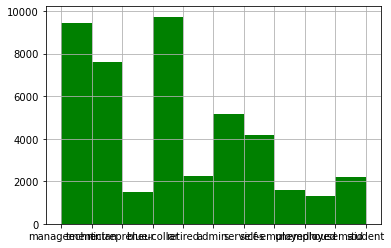


marital


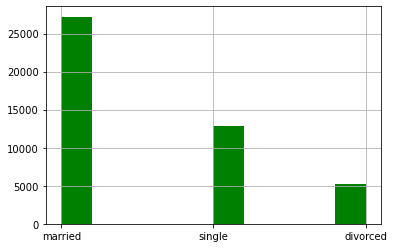


education


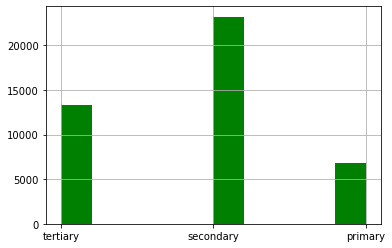


default


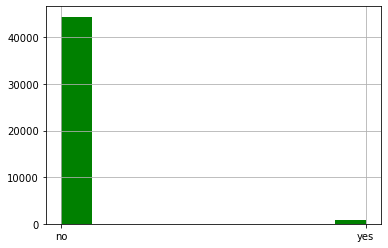


housing


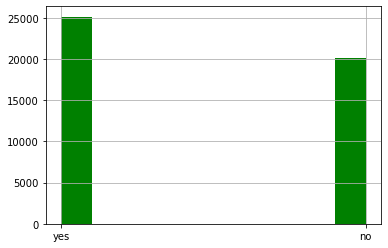


loan


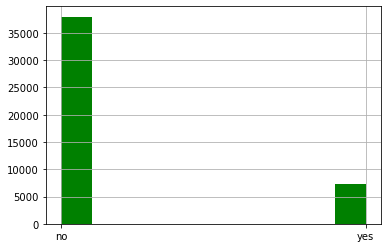


month


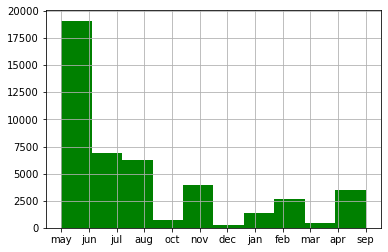


y


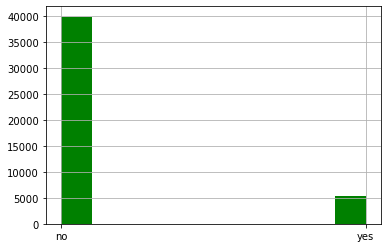

In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}')
    df[col].hist(color='green')
    plt.show()
    print()

default, housing, loan, y имеют бинарные значения. 

month разбросаны по 12 месяцам. 

marital, education разбросаны по трем значениям


Среди опрошенных больше всего замужних/женатых, получивших среднее образование. 

Случаи с дефолтом по кредиту крайне малы.   
Чуть больше половины опрошенных имеют ипотеку, а вот кредитов большая часть не имеет

Больше всего собрали данные в мае. 

И как результат, лишь небольшая часть открыла депозит. 

age


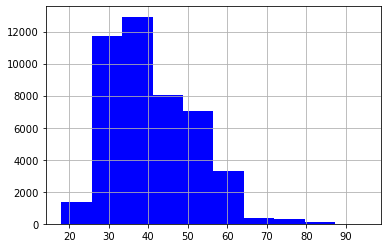


balance


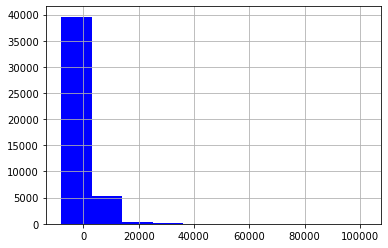


day


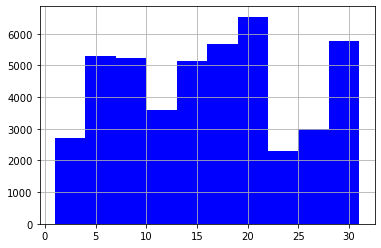


duration


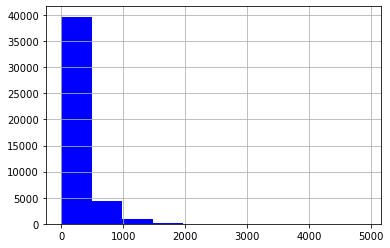


campaign


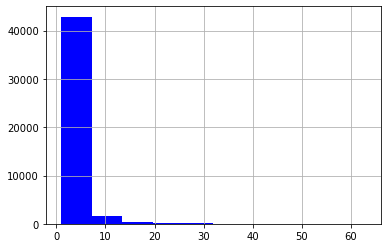


pdays


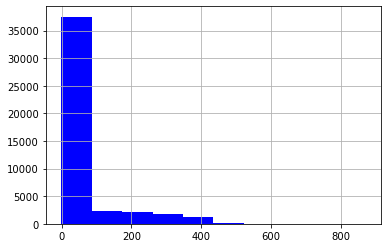


previous


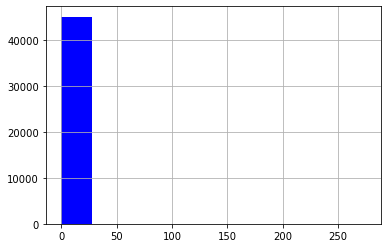

In [13]:
for col in df.select_dtypes(include='int').columns:
    print(f'{col}')
    df[col].hist(color='blue')
    plt.show()
    print()

Относительно числовых признаков, большая часть опрошенных — 30-40 лет. 
Большинство имеет отрицательный остаток на балансе, либо небольшую сумму. Проще говоря, деньги не копят на счету

Также абсолютному большенству звонили по одному разу, но есть и те, кого опрашивали несколько раз

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [15]:
for col in df.select_dtypes(include='object').columns:
  display(col)

'job'

'marital'

'education'

'default'

'housing'

'loan'

'month'

'y'

Сделаем целевую переменную числовой (и другие object также -- для корреляционной матрицы)

In [16]:
from sklearn import preprocessing

In [17]:
le = preprocessing.LabelEncoder()

#y
le.fit(df.y)
print(le.classes_)
df.y = le.transform(df.y)
le.fit_transform(df.y) #просто для вывода [0, 1]
print(le.classes_)

['no' 'yes']
[0 1]


In [18]:
for col in df.select_dtypes(include='object').columns:
  #остальные object
  df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,0


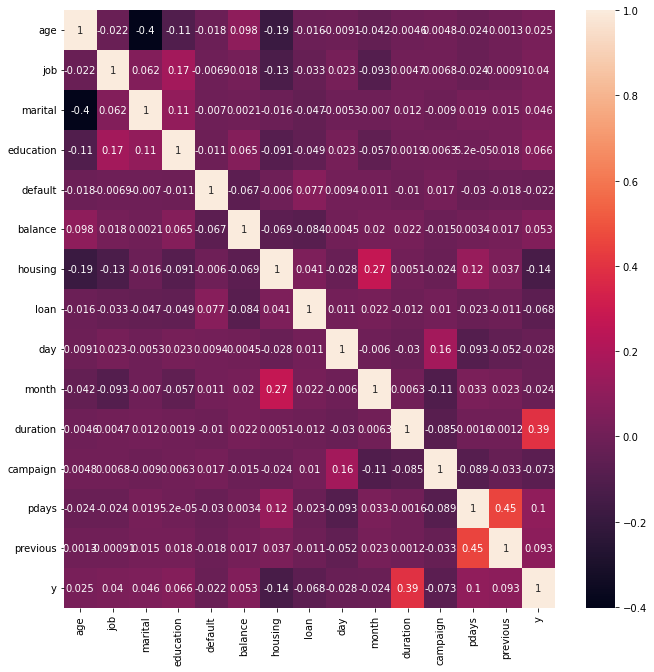

In [20]:
corr_matrix = df.corr()

ax = sns.heatmap(corr_matrix, annot=True)
ax.figure.set_size_inches(11, 11)

Интесную некую корреляционную зависимость можно заметить между duration и y. У остальных очень слабая корреляция. Но думаю, можно рассмотреть pdays, housing, education, loan, campaign, previous

Поработаем с выбросами

duration


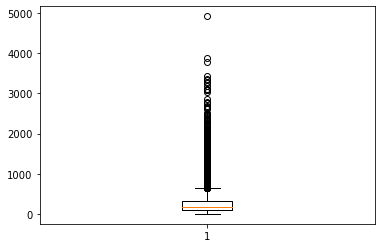


pdays


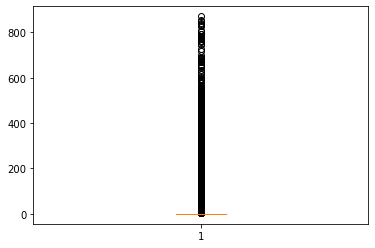


housing


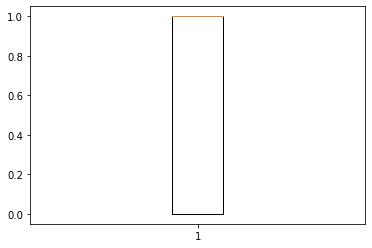


education


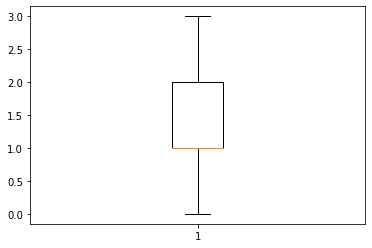


loan


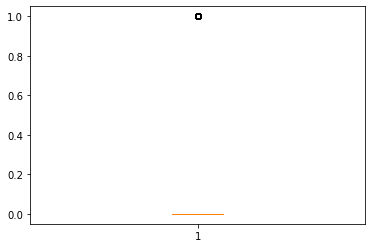


campaign


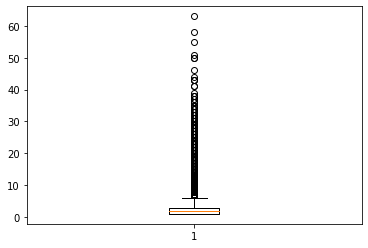


previous


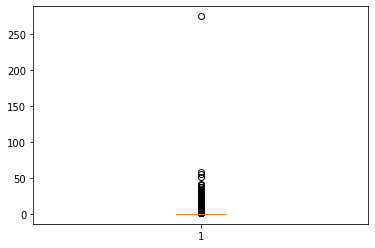

In [21]:
for col in ['duration', 'pdays', 'housing', 'education',
            'loan', 'campaign', 'previous']:
    print(f'{col}')
    plt.boxplot(df[col])
    plt.show()
    print()

Поработаем с полем default

In [22]:
df[(df.default != 0) & (df.y == 1)].y.count() / df.shape[0] * 100 

0.11501625710557166

In [23]:
df = df.drop(['default'], axis=1)

В целом, всего одна десятая процента от всех записей клиентов открывают вклады и у которых ранее был дефолт. Так что мы можем спокойно избавиться от этого параметра. 

Поработаем с полем duration

<AxesSubplot:>

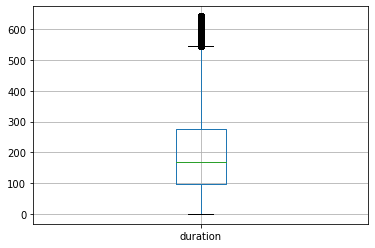

In [24]:
# будем выкидывать выбросы по принципу квартилей
Q1 =  df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < duration < @Q3 + 1.5*@IQR")
df.boxplot(column="duration")

<AxesSubplot:>

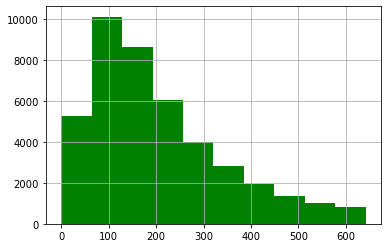

In [25]:
df.duration.hist(color='green') 

Поработаем с полем balance

<AxesSubplot:>

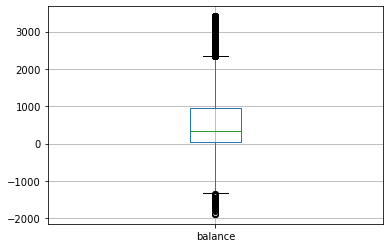

In [26]:
# будем выкидывать выбросы по принципу квартилей
Q1 =  df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < balance < @Q3 + 1.5*@IQR")
df.boxplot(column="balance")

<AxesSubplot:>

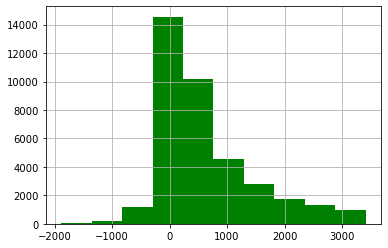

In [27]:
df.balance.hist(color='green') 

In [28]:
# # нормализация
# from sklearn.preprocessing import PowerTransformer

# df[['balance', 'y']] = PowerTransformer().fit_transform(df[['balance', 'y']])

# df.balance.hist(color='blue')

<AxesSubplot:>

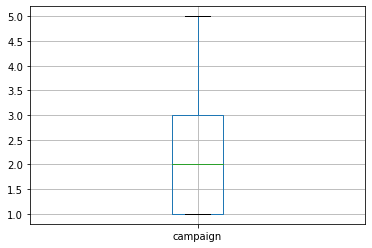

In [29]:
df.campaign

# будем выкидывать выбросы по принципу квартилей
Q1 =  df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < campaign < @Q3 + 1.5*@IQR")
df.boxplot(column="campaign")

pdays

In [30]:
print(df[df.pdays == -1].pdays.count())
print(df[df.pdays != -1].pdays.count())

27411
6490


Очень большая часть записей имеет значение -1. Так как здесь количество дней хранится, то -1 означает, что данных нет. А значит большая часть даннных отсутсвует. Поэтому убираем. 

In [31]:
df = df.drop(['pdays'], axis=1)

previous

In [32]:
df.previous
df[df.previous != 0].previous

24060     3
24062     1
24072     4
24077     3
24080     2
         ..
45194     5
45195     6
45201     4
45204     8
45210    11
Name: previous, Length: 6490, dtype: int64

А здесь, я считаю, что парамент все же нужно оставить. Здесь обозначается количество звонком. И тенденция, пусть и небольшая, но присутствует

Loan - бинарный. Поэтому оставлю так. 

Теперь добавим **пропущенные значения,** которые были найдены в самом начале. 

Столбцы: *job, education*

In [33]:
# заменим nan на моду, это в данном случае вполне возможно 
for column in ['job', 'education']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [34]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
previous     0
y            0
dtype: int64

In [35]:
df.to_csv("./result.csv")

ИТОГ:

В итоге датасет теперь содержит 33901 записей и 13 признаков, где целевая переменная - y. 

In [36]:
df_result = pd.read_csv("./result.csv", index_col = 0)
df_result.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,y
0,58,4,1,2,2143,1,0,5,8,261,1,0,0
1,44,9,2,1,29,1,0,5,8,151,1,0,0
2,33,2,1,1,2,1,1,5,8,76,1,0,0
3,47,1,1,3,1506,1,0,5,8,92,1,0,0
4,33,11,2,3,1,0,0,5,8,198,1,0,0


In [37]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33901 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        33901 non-null  int64
 1   job        33901 non-null  int64
 2   marital    33901 non-null  int64
 3   education  33901 non-null  int64
 4   balance    33901 non-null  int64
 5   housing    33901 non-null  int64
 6   loan       33901 non-null  int64
 7   day        33901 non-null  int64
 8   month      33901 non-null  int64
 9   duration   33901 non-null  int64
 10  campaign   33901 non-null  int64
 11  previous   33901 non-null  int64
 12  y          33901 non-null  int64
dtypes: int64(13)
memory usage: 3.6 MB


In [38]:
df_result.describe()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,y
count,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,40.585676,4.303649,1.169228,1.209758,635.245951,0.569069,0.169346,15.399162,5.585204,208.623934,2.007935,0.586118,0.088021
std,10.525604,3.295032,0.613615,0.740394,835.951800,0.495214,0.375063,8.305041,2.984479,139.137676,1.143081,2.365970,0.283330
min,18.000000,0.000000,0.000000,0.000000,-1884.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,47.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,347.000000,1.000000,0.000000,15.000000,6.000000,173.000000,2.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,973.000000,1.000000,0.000000,21.000000,8.000000,282.000000,3.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,3412.000000,1.000000,1.000000,31.000000,11.000000,642.000000,5.000000,275.000000,1.000000
